<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/FDIP_2_123B1F047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving flower.jpg to flower.jpg


(np.float64(-0.5), np.float64(312.5), np.float64(199.5), np.float64(-0.5))

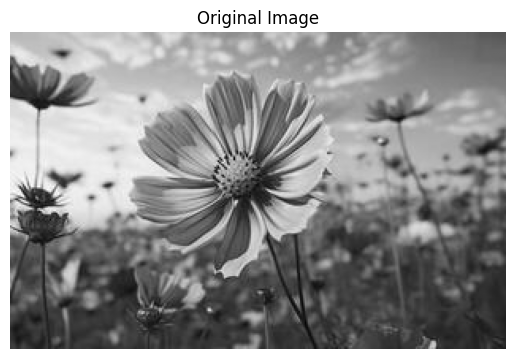

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")



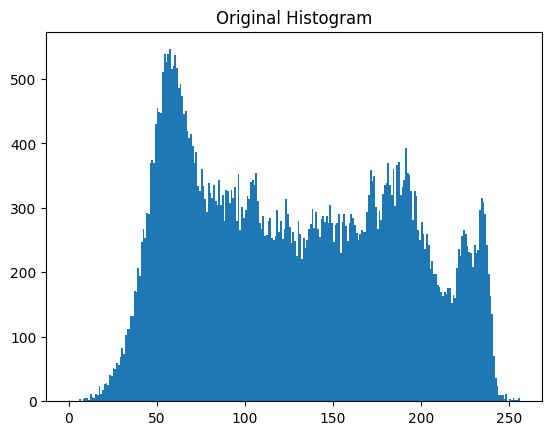

In [12]:
#plotting histogram
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title("Original Histogram")
plt.show()

(np.float64(-0.5), np.float64(312.5), np.float64(199.5), np.float64(-0.5))

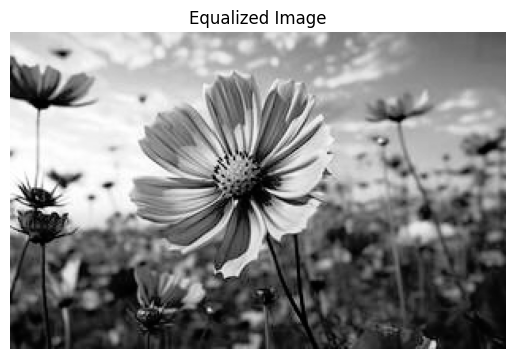

In [13]:
#eualised histogram
img_eq = cv2.equalizeHist(img)

plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

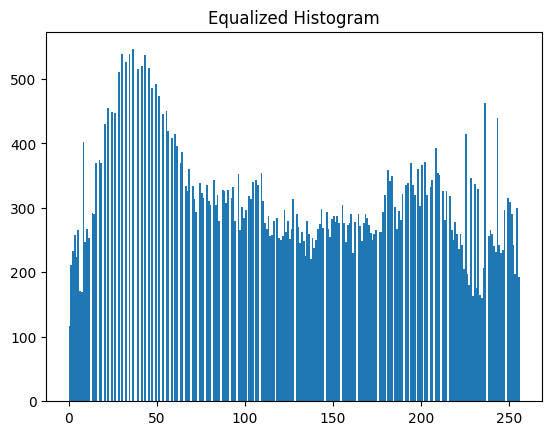

In [15]:
#equalised histogram
plt.hist(img_eq.ravel(), bins=256, range=[0,256])
plt.title("Equalized Histogram")
plt.show()


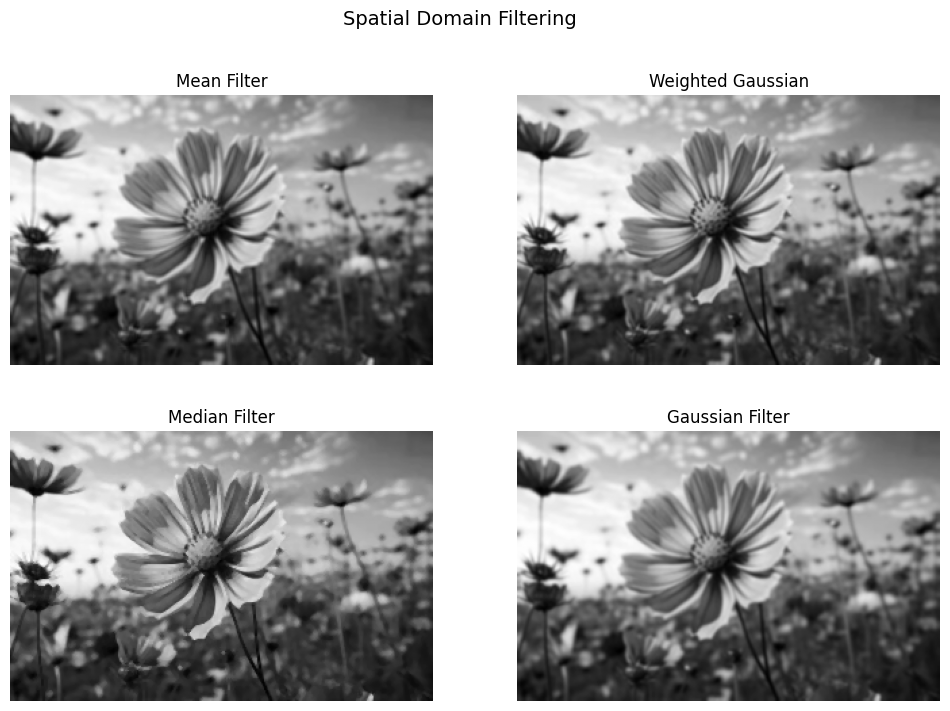

In [17]:
# spatial domain filter
mean_filter     = cv2.blur(img, (3,3))
weighted_filter = cv2.GaussianBlur(img, (3,3), 0)
median_filter   = cv2.medianBlur(img, 3)
gaussian_filter = cv2.GaussianBlur(img, (5,5), 1.0)

plt.figure(figsize=(12,8))
titles  = ["Mean Filter", "Weighted Gaussian", "Median Filter", "Gaussian Filter"]
filters = [mean_filter, weighted_filter, median_filter, gaussian_filter]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.suptitle("Spatial Domain Filtering", fontsize=14)
plt.show()


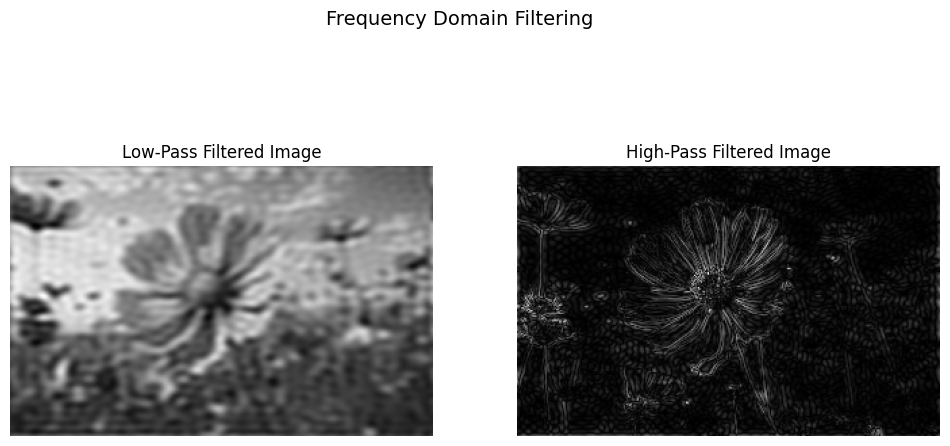

In [21]:

# low pass filter

mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (ccol, crow), r, 1, -1)
f_low = fshift * mask

#high pass dilter
mask2 = 1 - mask
f_high = fshift * mask2


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_low, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_high, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis("off")

plt.suptitle("Frequency Domain Filtering", fontsize=14)
plt.show()

